# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-15 20:14:16.638341


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Model

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-15 20:14:16.656034


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-15 20:14:17.042353


(60000, 28, 28)
2019-06-15 20:14:17.084123


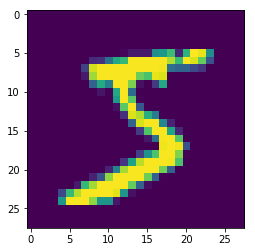

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-15 20:14:17.300084


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-15 20:14:17.533050


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-15 20:14:17.554540


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-15 20:14:17.578461


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-15 20:14:17.589526


In [10]:
## MAIN BLOCK

from keras.layers import Activation

height, width = 28, 28
num_filter = 32
num_classes = 10

x1 = Input(shape=(height, width, 1))
x2 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(x1)
added_x1_x2 = Add()([x1, x2])
x3 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(added_x1_x2)
added_x1_x2_x3 = Add()([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(added_x1_x2_x3)
x5 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(x4)
added_x4_x5 = Add()([x4, x5])
x6 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(added_x4_x5) 
added_x4_x5_x6 = Add()([x4, x5, x6])
x7 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(added_x4_x5_x6) 
added_x5_x6_x7 = Add()([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(added_x5_x6_x7)
x9 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(x8)
added_x8_x9 = Add()([x8, x9])
x10 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(added_x8_x9)
added_x8_x9_x10 = Add()([x8, x9, x10])
x11 = Convolution2D(num_filter, (3, 3), strides=(1, 1), use_bias=False ,padding='same')(added_x8_x9_x10)
_, ht, wd, channels = x11.get_shape().as_list()
Big_Kernel = Convolution2D(num_classes, (ht, wd))(x11)
Flat = Flatten()(Big_Kernel)
output = Dense(num_classes, activation='softmax')(Flat)

model = Model(inputs=[x1], outputs=[output])
print(datetime.datetime.now())



W0615 20:14:17.651725 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 20:14:17.670578 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 20:14:17.676150 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 20:14:17.701077 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



2019-06-15 20:14:17.804872


In [11]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 28, 28, 32)   0           input_1[0][0]                    
                                                                 conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   9216        add_1[0][0]                      
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0615 20:14:17.849858 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 20:14:17.884419 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



2019-06-15 20:14:17.907588


In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0615 20:14:18.026234 139866371377024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0615 20:14:18.196602 139866371377024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.2126 - acc: 0.9377
Epoch 2/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.1109 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.0988 - acc: 0.9697
Epoch 4/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.0899 - acc: 0.9735
Epoch 5/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0827 - acc: 0.9742
Epoch 6/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.0749 - acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.0712 - acc: 0.9777
Epoch 8/10
60000/60000 [==============================] - 36s 602us/step - loss: 0.0664 - acc: 0.9797
Epoch 9/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.0604 - acc: 0.9813
Epoch 10/10
60000/60000 [==============================] - 36s 605us/step - loss: 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-15 20:20:29.497549


In [15]:
print(score)
print(datetime.datetime.now())

[0.062295432032831013, 0.9797]
2019-06-15 20:20:29.521207
